In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data set
data=pd.read_csv("C:\\Users\\fahad\\OneDrive\\Desktop\\Unified mentor\\proj 3 Google Playstore\\googleplaystore.csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# check for null values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# remove null values
data=data.dropna(subset=["Rating","Type","Content Rating","Current Ver","Android Ver"])
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
# convert the data type
data["Reviews"]=data["Reviews"].astype(int)
data["Price"]=data["Price"].astype(str).str.replace("$","",regex=False)
data["Price"]=data["Price"].astype(str).str.replace("Everyone","0")
data["Price"]=data["Price"].astype(float)
data["Installs"]=data["Installs"].str.replace("+","",regex=False)
data["Installs"]=data["Installs"].str.replace(",","")
data["Installs"]=data["Installs"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1023.8+ KB


In [9]:
# Conversion of size
def convert_size(size):
    if "M" in size:
        return float(size.replace("M",""))
    elif "K" in size:
        return float(size.replace("K",""))/1000
    else: return np.nan

data["Size"]=data["Size"].apply(convert_size)
data.head()
                                  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Handling duplicates
data=data.drop_duplicates(subset="App",keep="first")

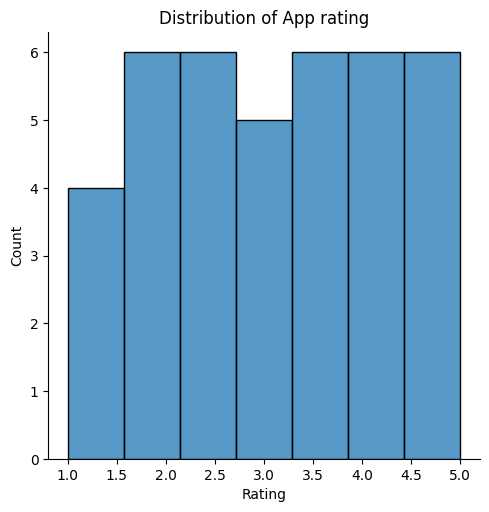

In [11]:
# Distribution of App rating
count_app_rating=data["Rating"].value_counts().reset_index()
sns.displot(count_app_rating["Rating"])
plt.title("Distribution of App rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [12]:
# Top 10 categories by the no. of apps
top_categories=data["Category"].value_counts().reset_index()
top_ten_categories=top_categories.sort_values(by="count",ascending=False).head(10)
top_ten_categories

,Category,count
0,FAMILY,1607
1,GAME,912
2,TOOLS,717
3,FINANCE,302
4,PRODUCTIVITY,301
5,LIFESTYLE,301
6,PERSONALIZATION,296
7,MEDICAL,290
8,BUSINESS,263
9,PHOTOGRAPHY,263


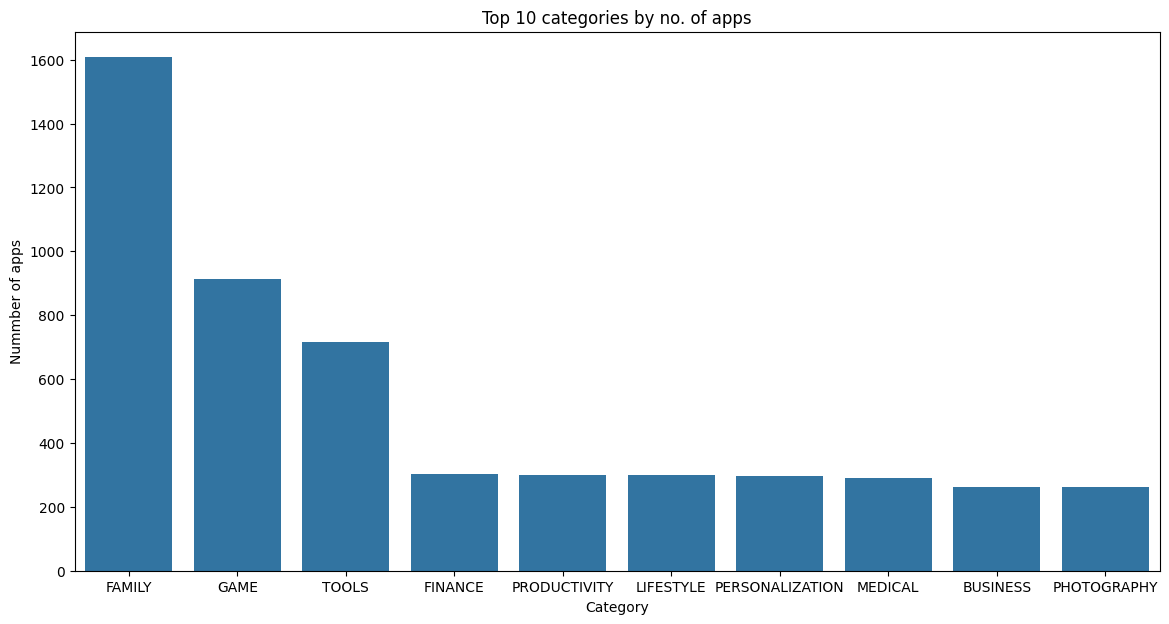

In [13]:
# Visualising
plt.figure(figsize=(14,7))
sns.barplot(top_ten_categories, x="Category", y="count")
plt.title("Top 10 categories by no. of apps")
plt.xlabel("Category")
plt.ylabel("Nummber of apps")
plt.show()

In [14]:
# No. of paid and free apps
paid_and_free_apps=data["Type"].value_counts().reset_index()
paid_and_free_apps

,Type,count
0,Free,7588
1,Paid,602


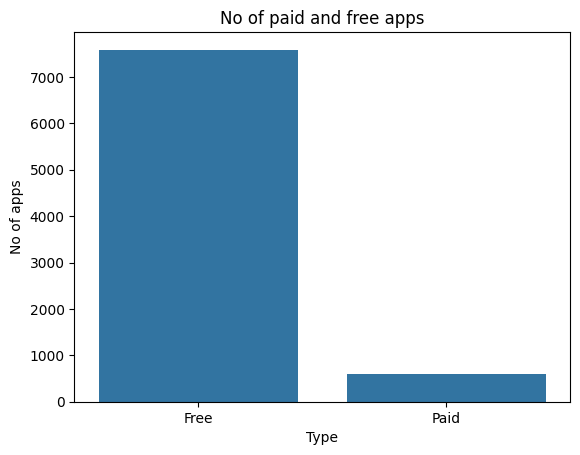

In [15]:
# visualisation
sns.barplot(paid_and_free_apps,x="Type",y="count")
plt.title("No of paid and free apps")
plt.xlabel("Type")
plt.ylabel("No of apps")
plt.show()

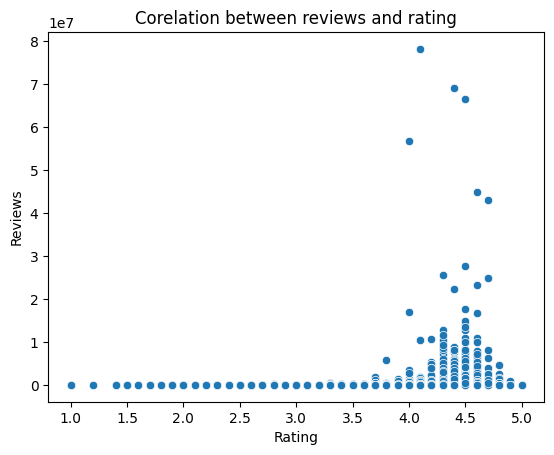

In [16]:
# visualisation
sns.scatterplot(data, x="Rating", y="Reviews")
plt.title("Corelation between reviews and rating")
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.show()

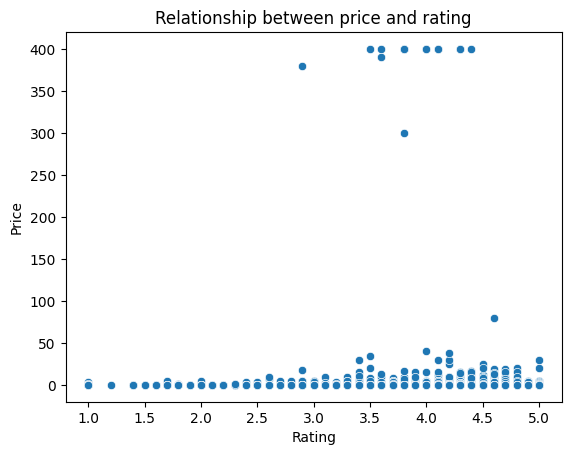

In [17]:
# Relationship between price and rating
sns.scatterplot(data, x="Rating", y="Price")
plt.title("Relationship between price and rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

In [18]:
# Top genres by install count
top_genres=data.groupby("Genres")["Installs"].sum().sort_values(ascending=False).head(10).reset_index()
top_genres

,Genres,Installs
0,Communication,11038241530
1,Tools,7989224500
2,Productivity,5793070180
3,Social,5487841475
4,Photography,4649143130
5,Video Players & Editors,3916797200
6,Arcade,3755077727
7,Action,3483037470
8,Casual,3052778970
9,Entertainment,3014624820


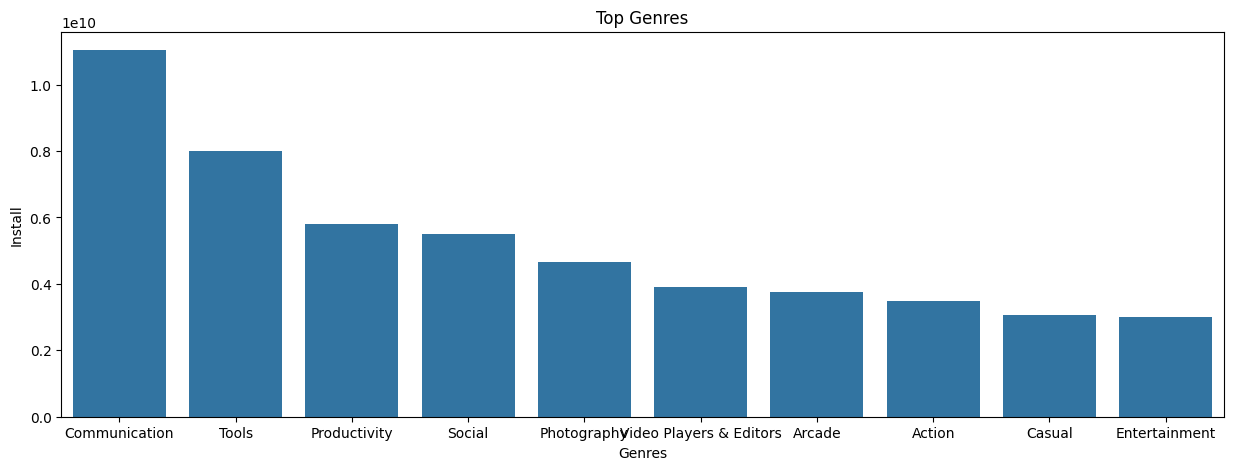

In [20]:
# visualisation
plt.figure(figsize=(15,5))
sns.barplot(top_genres, x="Genres", y="Installs")
plt.title("Top Genres")
plt.xlabel("Genres")
plt.ylabel("Install")
plt.show()